# Random Sample Imputation

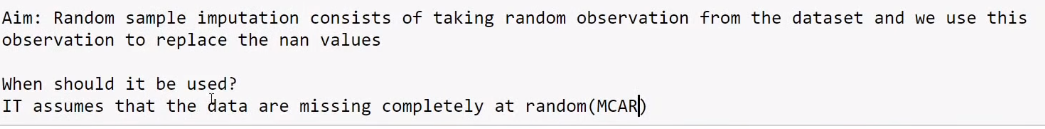



### All the techniques of handling ,missing values

1. Mean/ Median/Mode imputation
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

In [113]:
import pandas as pd 

In [114]:
df = pd.read_csv('titanic dataset.csv')

In [1]:
df.head()

NameError: name 'df' is not defined

In [115]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df[df[]]

In [116]:
newdf = pd.read_csv('titanic dataset.csv', usecols=['Age','Fare','Survived'])
df2 =newdf
newdf.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [117]:
newdf.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [118]:
newdf.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [119]:
# generating random value 
# to genereate random first we have to drop null values

df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [120]:
#writing a function to replace nan value

def impute_nan(daf, feature, median):
    daf[feature+"_median"] = daf[feature].fillna(median)
    daf[feature+"_random"] = daf[feature]
    # random sample to fill null values
    random_sample = daf[feature].dropna().sample(daf[feature].isnull().sum(),random_state=0)
    
    # assigning random values to nan values with the help of index
    random_sample.index = daf[daf['Age'].isnull()].index
    daf.loc[daf[feature].isnull(), feature+"_random"] = random_sample

In [121]:
median = df.Age.median()
median

28.0

In [122]:
impute_nan(newdf,'Age',median)

In [123]:
newdf[newdf['Age'].isnull()].head(10)

,Survived,Age,Fare,Age_median,Age_random
5,0,NaN,8.4583,28.0,28.00
17,1,NaN,13.0000,28.0,50.00
19,1,NaN,7.2250,28.0,0.92
26,0,NaN,7.2250,28.0,36.00
28,1,NaN,7.8792,28.0,26.00
29,0,NaN,7.8958,28.0,36.00
31,1,NaN,146.5208,28.0,31.00
32,1,NaN,7.7500,28.0,65.00
36,1,NaN,7.2292,28.0,65.00
42,0,NaN,7.8958,28.0,47.00


In [124]:

import matplotlib.pyplot as plt
%matplotlib inline

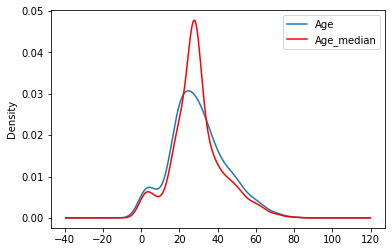

In [143]:
fig = plt.figure()
ax = fig.add_subplot(111)
newdf['Age'].plot(kind='kde', ax=ax)
newdf.Age_median.plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

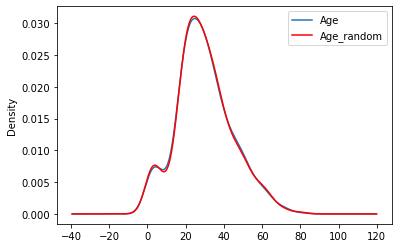

In [142]:
fig = plt.figure()
ax = fig.add_subplot(111)
newdf['Age'].plot(kind='kde', ax=ax)

newdf.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As we can see that random sample is almost has same distrubution as age whereas median has high distribution.

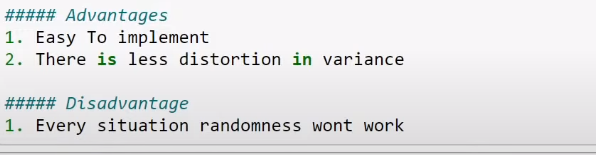

#### Advantage
1. Easy to implement
2. less distortion in data.

#### Disadvantage
1. wont work in every situation.



# Capturing NAN values with a new feature

In [146]:
import numpy as np
newdf['Age_Nan'] = np.where(newdf['Age'].isnull(),1,0)

In [149]:
# it tells the importance of feature 
# it can also tell us that some thing has happend to column age where ever the value is 1.
newdf.head(10 )

,Survived,Age,Fare,Age_median,Age_random,Age_Nan
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0
5,0,NaN,8.4583,28.0,28.0,1
6,0,54.0,51.8625,54.0,54.0,0
7,0,2.0,21.0750,2.0,2.0,0
8,1,27.0,11.1333,27.0,27.0,0
9,1,14.0,30.0708,14.0,14.0,0


# Advantage
1. Easy to implement.
2. Capture the importance of missing values.
3. good for less number of features.

# Disadvatnage
1.creating additional feature whihc lead to curse of dimensionaltiy